<a href="https://colab.research.google.com/github/11409kimhanwool/---/blob/main/%EC%A0%95%EB%B3%B4_%EC%B5%9C%EC%A2%85_%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%91%9C%EC%8B%9C_%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import chardet

# 파일의 인코딩 확인
with open('/content/Special-Ⅱ-New-Materials_-상온·상압-초전도체_-맥신_-에어로겔…-.csv', 'rb') as f:
    result = chardet.detect(f.read())

print(result['encoding'])


EUC-KR


In [5]:
!apt-get install -y fonts-nanum*
!fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 45 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

In [2]:
pip install chardet


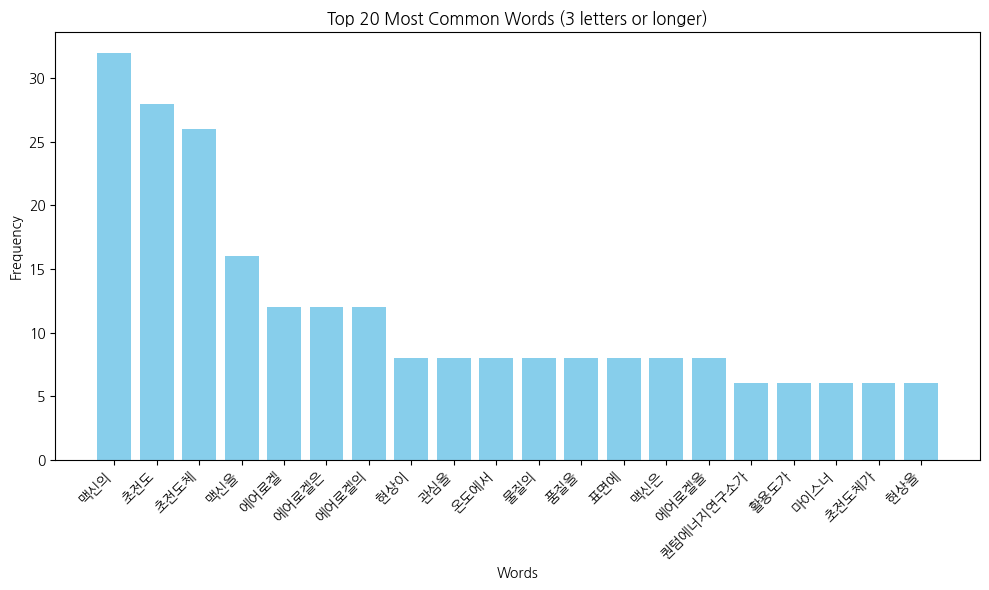

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import chardet

# 한글 나눔 폰트 설정
plt.rc('font', family='NanumGothic')

# 파일 인코딩 자동 탐지
file_path = '/content/최종 프로젝트 논문 (전처리 왼) - 최종 프로젝트 논문 (전처리 왼).csv'
with open(file_path, 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

# CSV 파일 읽기
df = pd.read_csv(file_path, encoding=encoding)

# 제외할 단어 목록
exclude_words = {"때문이다", "것으로", "하지만", "99의", "99가", "것이다", "99는", "99에", "아니다", "있다는","것이라는"}

# 단어 추출 및 빈도 계산
words = []

for i in range(len(df)):
    # 각 논문의 제목과 본문에서 단어 추출
    title_words = re.findall(r'\b\w{3,}\b', df.loc[i, 'text1'].lower())
    content_words = re.findall(r'\b\w{3,}\b', df.loc[i, 'text1'].lower())

    # 제외할 단어 제거 및 전체 단어 리스트에 추가
    words.extend(word for word in title_words if word not in exclude_words)
    words.extend(word for word in content_words if word not in exclude_words)

# 단어 빈도 계산
word_count = Counter(words)

# 가장 많이 나온 상위 20개 단어 추출
top_words = word_count.most_common(20)

# 막대 그래프로 표시
plt.figure(figsize=(10, 6))
words, counts = zip(*top_words)
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words (3 letters or longer)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [7]:
pip install wordcloud


In [16]:
pip install konlpy wordcloud


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 27.2 MB/s eta 0:00:00


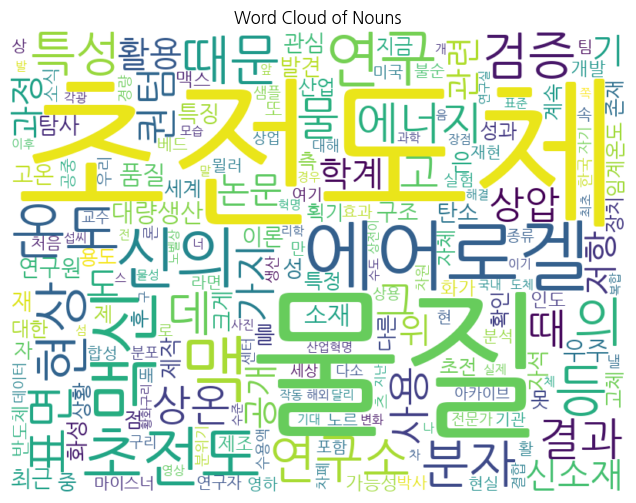

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
from wordcloud import WordCloud
from konlpy.tag import Okt
import chardet

# 한글 나눔 폰트 설정
plt.rc('font', family='NanumGothic')

# 파일 인코딩 자동 탐지
file_path = '/content/최종 프로젝트 논문 (전처리 왼) - 최종 프로젝트 논문 (전처리 왼).csv'
with open(file_path, 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

# CSV 파일 읽기
df = pd.read_csv(file_path, encoding=encoding)

# 제외할 단어 목록
exclude_words = {"때문이다", "것으로", "하지만", "99의", "99가", "것이다", "99는", "99에", "아니다", "있다는","것","이","수"}

# Okt 형태소 분석기 객체 생성
okt = Okt()

# 명사 추출 및 빈도 계산
nouns = []

for i in range(len(df)):
    # 각 논문의 제목과 본문에서 명사 추출
    title_nouns = okt.nouns(df.loc[i, 'text1'])
    content_nouns = okt.nouns(df.loc[i, 'text1'])

    # 제외할 단어 제거 및 전체 명사 리스트에 추가
    nouns.extend(noun for noun in title_nouns if noun not in exclude_words)
    nouns.extend(noun for noun in content_nouns if noun not in exclude_words)

# 명사 빈도 계산
noun_count = Counter(nouns)

# 가장 많이 나온 상위 20개 명사 추출
top_nouns = noun_count.most_common(20)

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path='NanumGothic.ttf',  # 사용할 폰트 경로를 지정
    background_color='white',
    width=800,
    height=600
).generate_from_frequencies(noun_count)

# 워드클라우드 표시
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Nouns')
plt.show()



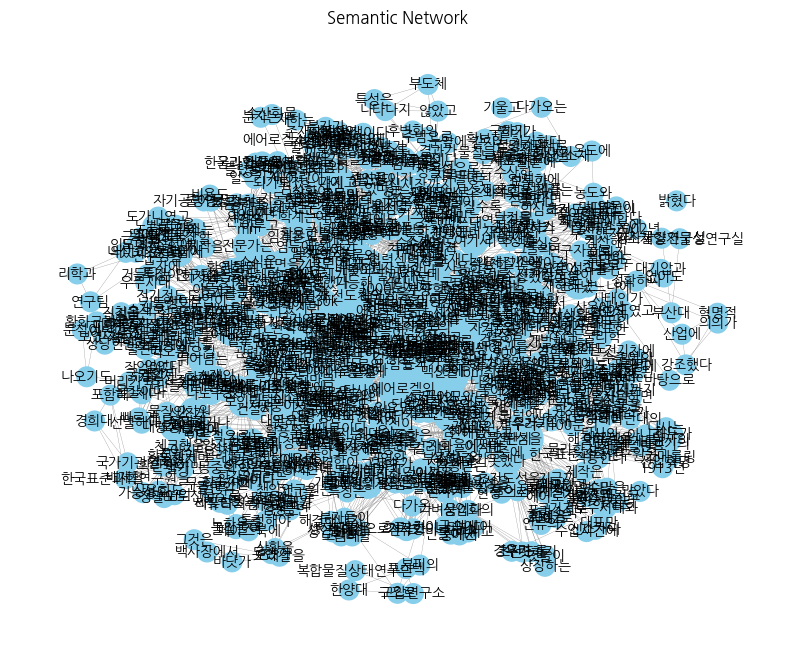

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import re
from collections import Counter

# CSV 파일 읽기
df = pd.read_csv('/content/Special-Ⅱ-New-Materials_-상온·상압-초전도체_-맥신_-에어로겔…-.csv', encoding='EUC-KR')

# 단어 추출 및 빈도 계산
words = []

for i in range(len(df)):
    # 각 논문의 제목과 본문에서 단어 추출
    title_words = re.findall(r'\b\w{3,}\b', df.loc[i, 'text1'].lower())
    content_words = re.findall(r'\b\w{3,}\b', df.loc[i, 'text1'].lower())

    # 전체 단어 리스트에 추가
    words.extend(title_words)
    words.extend(content_words)

# 단어 빈도 계산
word_count = Counter(words)

# 의미 연결망 그래프 생성
G = nx.Graph()

# 단어 빈도를 가중치로 추가
for word, count in word_count.items():
    if len(word) >= 3:  # 3글자 이상의 단어만 고려
        G.add_node(word, weight=count)

# 연결된 단어 간의 관계 추가
for i in range(len(df)):
    title_words = re.findall(r'\b\w{3,}\b', df.loc[i, 'text1'].lower())
    content_words = re.findall(r'\b\w{3,}\b', df.loc[i, 'text1'].lower())

    for word1 in title_words:
        for word2 in content_words:
            if word1 != word2 and G.has_node(word1) and G.has_node(word2):
                if G.has_edge(word1, word2):
                    G[word1][word2]['weight'] += 1
                else:
                    G.add_edge(word1, word2, weight=1)

# 그래프 그리기
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.3)
nx.draw_networkx_nodes(G, pos, node_size=[d['weight']*100 for n, d in G.nodes(data=True)], node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=[d['weight']*0.1 for u, v, d in G.edges(data=True)], edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='NanumGothic')
plt.title('Semantic Network')
plt.axis('off')
plt.show()


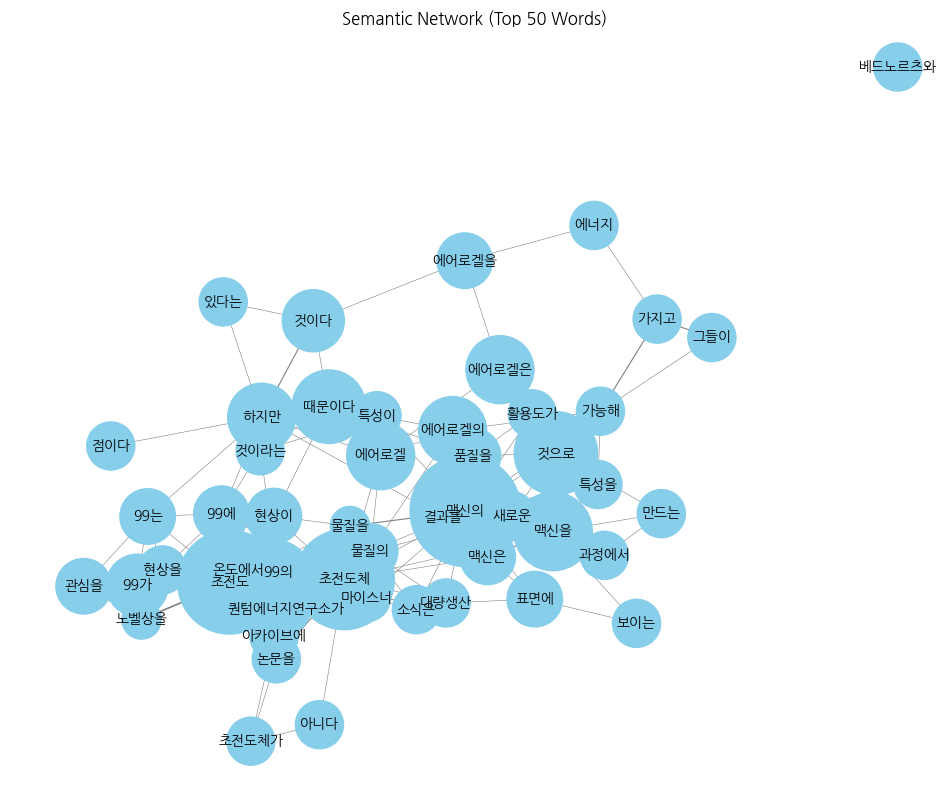

In [26]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import re
from collections import Counter


# 파일 인코딩 자동 탐지
file_path = '/content/최종 프로젝트 논문 (전처리 왼) - 최종 프로젝트 논문 (전처리 왼).csv'
with open(file_path, 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

# 단어 추출 및 빈도 계산
words = []

for i in range(len(df)):
    # 각 논문의 제목과 본문에서 단어 추출
    title_words = re.findall(r'\b\w{3,}\b', df.loc[i, 'text1'].lower())
    content_words = re.findall(r'\b\w{3,}\b', df.loc[i, 'text1'].lower())

    # 전체 단어 리스트에 추가
    words.extend(title_words)
    words.extend(content_words)

# Okt 형태소 분석기 객체 생성
okt = Okt()

# 명사 추출 및 빈도 계산
nouns = []

for i in range(len(df)):
    # 각 논문의 제목과 본문에서 명사 추출
    title_nouns = okt.nouns(df.loc[i, 'text1'])
    content_nouns = okt.nouns(df.loc[i, 'text1'])

    # 제외할 단어 제거 및 전체 명사 리스트에 추가
    nouns.extend(noun for noun in title_nouns if noun not in exclude_words)
    nouns.extend(noun for noun in content_nouns if noun not in exclude_words)

# 명사 빈도 계산
noun_count = Counter(nouns)

# 가장 많이 나온 상위 20개 명사 추출
top_nouns = noun_count.most_common(20)

# 제외할 단어 목록
exclude_words = {"때문이다", "것으로", "하지만", "99의", "99가", "것이다", "99는", "99에", "아니다", "있다는","것이라는"}
# 의미 연결망 그래프 생성
G = nx.Graph()

# 단어 빈도를 가중치로 추가
for word, count in word_count.items():
    if word in top_words:
        G.add_node(word, weight=count)

# 연결된 단어 간의 관계 추가
for i in range(len(df)):
    title_words = re.findall(r'\b\w{3,}\b', df.loc[i, 'text1'].lower())
    content_words = re.findall(r'\b\w{3,}\b', df.loc[i, 'text1'].lower())

    for word1 in title_words:
        for word2 in content_words:
            if word1 != word2 and word1 in top_words and word2 in top_words:
                if G.has_edge(word1, word2):
                    G[word1][word2]['weight'] += 1
                else:
                    G.add_edge(word1, word2, weight=1)

# 그래프 그리기
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.3)
nx.draw_networkx_nodes(G, pos, node_size=[d['weight']*200 for n, d in G.nodes(data=True)], node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=[d['weight']*0.2 for u, v, d in G.edges(data=True)], edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='NanumGothic')
plt.title('Semantic Network (Top 50 Words)')
plt.axis('off')
plt.show()


<ipython-input-33-6b6db369b9b4>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='viridis')


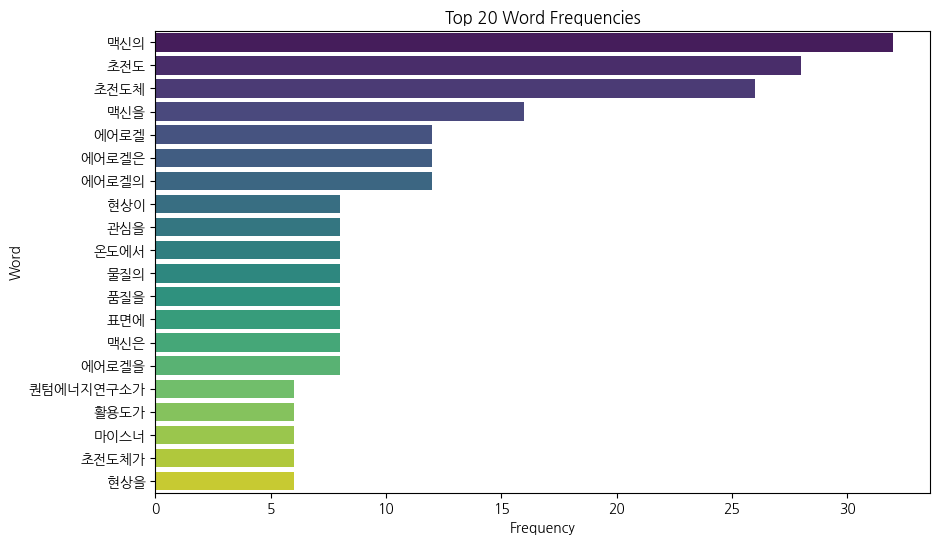

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
from konlpy.tag import Okt
import chardet

# 파일 인코딩 자동 탐지
file_path = '/content/최종 프로젝트 논문 (전처리 왼) - 최종 프로젝트 논문 (전처리 왼).csv'
with open(file_path, 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

# CSV 파일 읽기
df = pd.read_csv(file_path, encoding=encoding)

# 제외할 단어 목록
exclude_words = {"때문이다", "것으로", "하지만", "99의", "99가", "것이다", "99는", "99에", "아니다", "있다는", "것이라는"}

# 단어 추출 및 빈도 계산
words = []

for i in range(len(df)):
    # 각 논문의 제목과 본문에서 단어 추출
    title_words = re.findall(r'\b\w{3,}\b', df.loc[i, 'text1'].lower())
    content_words = re.findall(r'\b\w{3,}\b', df.loc[i, 'text1'].lower())

    # 제외할 단어 제거 및 전체 단어 리스트에 추가
    words.extend(word for word in title_words if word not in exclude_words)
    words.extend(word for word in content_words if word not in exclude_words)

# Okt 형태소 분석기 객체 생성
okt = Okt()

# 명사 추출 및 빈도 계산
nouns = []

for i in range(len(df)):
    # 각 논문의 제목과 본문에서 명사 추출
    title_nouns = okt.nouns(df.loc[i, 'text1'])
    content_nouns = okt.nouns(df.loc[i, 'text1'])

    # 제외할 단어 제거 및 전체 명사 리스트에 추가
    nouns.extend(noun for noun in title_nouns if noun not in exclude_words)
    nouns.extend(noun for noun in content_nouns if noun not in exclude_words)

# 명사 빈도 계산
noun_count = Counter(nouns)

# 가장 많이 나온 상위 20개 명사 추출
top_nouns = noun_count.most_common(20)

# 단어 빈도 계산
word_count = Counter(words)

# 가장 많이 출현하는 상위 20개 단어 선택
top_words = [word for word, _ in word_count.most_common(20)]

# 단어 빈도 데이터프레임 생성
word_freq_df = pd.DataFrame(word_count.most_common(20), columns=['Word', 'Frequency'])

# Seaborn을 사용하여 단어 빈도수 그래프 생성
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Word Frequencies')
plt.show()


<ipython-input-34-6cc8b20c385e>:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Word', y='Frequency', data=word_freq_df, marker='o', color='skyblue', ci=None)


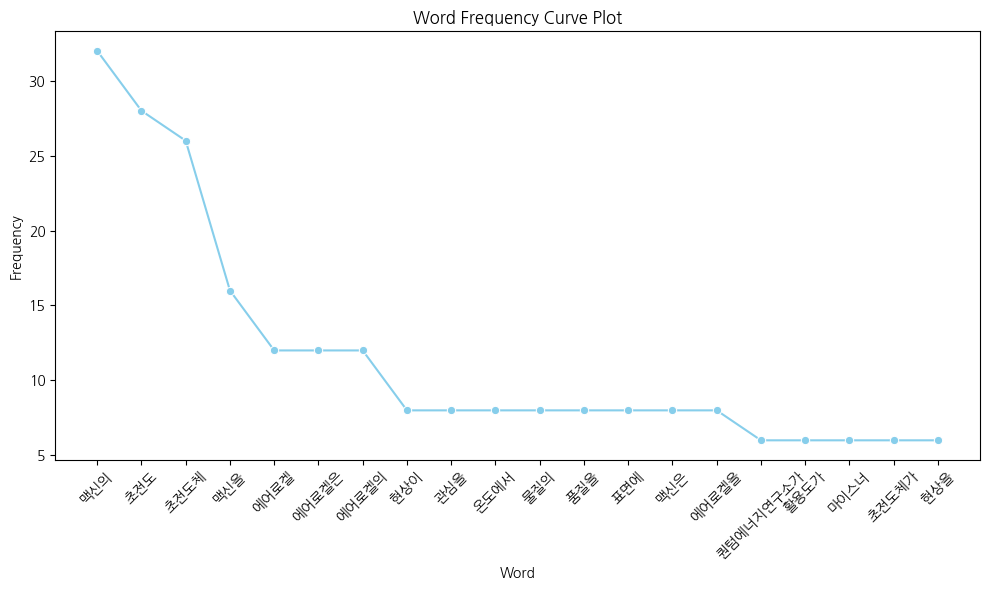

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
import chardet

# 파일 인코딩 자동 탐지
file_path = '/content/최종 프로젝트 논문 (전처리 왼) - 최종 프로젝트 논문 (전처리 왼).csv'
with open(file_path, 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

# CSV 파일 읽기
df = pd.read_csv(file_path, encoding=encoding)

# 제외할 단어 목록
exclude_words = {"때문이다", "것으로", "하지만", "99의", "99가", "것이다", "99는", "99에", "아니다", "있다는", "것이라는"}

# 단어 추출 및 빈도 계산
words = []

for i in range(len(df)):
    # 각 논문의 제목과 본문에서 단어 추출
    title_words = re.findall(r'\b\w{3,}\b', df.loc[i, 'text1'].lower())
    content_words = re.findall(r'\b\w{3,}\b', df.loc[i, 'text1'].lower())

    # 제외할 단어 제거 및 전체 단어 리스트에 추가
    words.extend(word for word in title_words if word not in exclude_words)
    words.extend(word for word in content_words if word not in exclude_words)

# 단어 빈도 계산
word_count = Counter(words)

# 가장 많이 출현하는 상위 20개 단어 선택
top_words = [word for word, _ in word_count.most_common(20)]

# 단어 빈도 데이터프레임 생성
word_freq_df = pd.DataFrame(word_count.most_common(20), columns=['Word', 'Frequency'])

# Seaborn을 사용하여 곡선 그래프 생성
plt.figure(figsize=(10, 6))
sns.lineplot(x='Word', y='Frequency', data=word_freq_df, marker='o', color='skyblue', ci=None)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Word Frequency Curve Plot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
pip install pandas seaborn matplotlib
